In [1]:
import pandas as pd
import numpy as np

In [2]:
futures = pd.read_csv("BNBUSDT_Binance_futures_data_day.csv")
spot = pd.read_csv("Binance_BNBUSDT_d.csv")

In [3]:
startDate = pd.Timestamp('2021/6/1')
endDate = pd.Timestamp('2021/6/30')

In [4]:
futures['date'] = futures['date'].apply(lambda x: pd.Timestamp(x.split(' ')[0]))
spot['date'] = spot['date'].apply(lambda x: pd.Timestamp(x.split(' ')[0]))

In [5]:
futures_june21 = futures[(futures['date']<=endDate) & (futures['date']>=startDate)].sort_values(['date']).reset_index(drop=True)
spot_june21 = spot[(spot['date']<=endDate) & (spot['date']>=startDate)].sort_values(['date']).reset_index(drop=True)

In [6]:
df = pd.concat([spot_june21[['date','close']],futures_june21[['close']]],axis = 1,ignore_index = True)
df.columns=['date','spot','futures']
df

,date,spot,futures
0,2021-06-01,362.39,362.13
1,2021-06-02,401.54,401.34
2,2021-06-03,428.48,428.42
3,2021-06-04,390.70,390.83
4,2021-06-05,390.08,389.70
5,2021-06-06,393.73,393.52
6,2021-06-07,357.96,358.00
7,2021-06-08,352.50,352.34
8,2021-06-09,375.54,375.39
9,2021-06-10,351.94,351.88


Assumptions:
1. 400k BNB before deposit
2. Deposit coins on 1st June
3. My share remains same
4. Total liquidity remains same

In [7]:
APR = 0.5
quantity_BNB = 4e5
price_BNB = 362.39
quantity_USDT = quantity_BNB* price_BNB
value_pool_before_deposit = quantity_BNB *price_BNB + quantity_USDT *1
share = 1e5 / value_pool_before_deposit
print(f"Share: {share}")
liquidity = quantity_BNB *quantity_USDT
print(f"Liquidity: {liquidity}")

Share: 0.00034493225530505807
Liquidity: 57982400000000.0


In [8]:
df['PnL_spot'] = df['spot']-df['spot'].shift()
df['PnL_futures'] = df['futures'].shift() - df['futures']
df = df.fillna(0)
df['quantity_BNB_pool'] = np.sqrt(liquidity/df['spot'])
df['quantity_USDT_pool'] = df['quantity_BNB_pool'] * df['spot']
df['quantity_BNB_mine'] = df['quantity_BNB_pool'] * share
df['quantity_USDT_mine'] = df['quantity_USDT_pool'] * share
df['trading_fee_percent'] = APR/365
df.loc[0,'value_mine'] = df.loc[0,'quantity_USDT_mine'] + df.loc[0,'quantity_BNB_mine'] * (df.loc[0,'PnL_futures'] + df.loc[0,'PnL_spot'] + df.loc[0,'spot'])
for i in range(1,len(df)):
    df.loc[i,'value_mine'] = df.loc[i,'quantity_USDT_mine'] + df.loc[i,'quantity_BNB_mine'] * (df.loc[i,'PnL_futures'] + df.loc[i,'PnL_spot'] + df.loc[i,'spot']) +df.loc[i,'trading_fee_percent'] * df.loc[i-1,'value_mine']
df

,date,spot,futures,PnL_spot,PnL_futures,quantity_BNB_pool,quantity_USDT_pool,quantity_BNB_mine,quantity_USDT_mine,trading_fee_percent,value_mine
0,2021-06-01,362.39,362.13,0.00,0.00,400000.000000,1.449560e+08,137.972902,50000.000000,0.00137,100000.000000
1,2021-06-02,401.54,401.34,39.15,-39.21,380000.078645,1.525852e+08,131.074284,52631.568055,0.00137,105392.257954
2,2021-06-03,428.48,428.42,26.94,-27.08,367860.211460,1.576207e+08,126.886852,54368.478506,0.00137,108863.565809
3,2021-06-04,390.70,390.83,-37.78,37.59,385235.577227,1.505115e+08,132.880176,51916.284949,0.00137,103956.450838
4,2021-06-05,390.08,389.70,-0.62,1.13,385541.605768,1.503921e+08,132.985736,51875.075740,0.00137,103960.380301
5,2021-06-06,393.73,393.52,3.65,-3.82,383750.399327,1.510940e+08,132.367891,52117.209611,0.00137,104354.328160
6,2021-06-07,357.96,358.00,-35.77,35.52,402467.526031,1.440673e+08,138.824031,49693.450295,0.00137,99495.145716
7,2021-06-08,352.50,352.34,-5.46,5.66,405572.531139,1.429643e+08,139.895048,49313.004369,0.00137,98790.282468
8,2021-06-09,375.54,375.39,23.04,-23.05,392934.347030,1.475626e+08,135.535731,50899.088235,0.00137,101932.150267
9,2021-06-10,351.94,351.88,-23.60,23.51,405895.072398,1.428507e+08,140.006303,49273.818186,0.00137,98674.668888


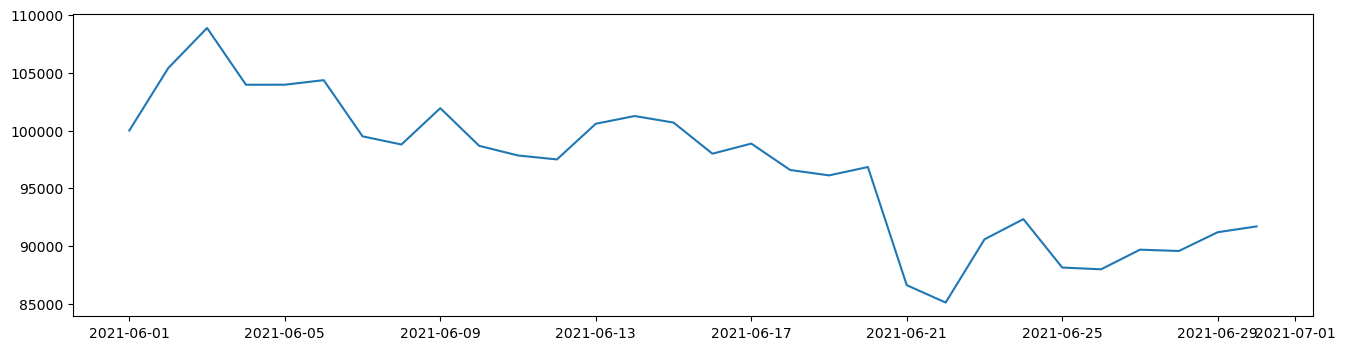

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 4), dpi = 100)
plt.plot(df.set_index('date').value_mine)
plt.show()